# Étude du Dataset : The Stanford Question Answering Dataset


## Structure du dataset :

- Version = 2.0
- Data => Array de dictionnaires
- Paragraphes => Array de dictionnaire :
    - Contexte = Le texte qui permet de répondre aux questions.
    - Qas => Array de dictionnaire :
        - Question
        - Id
        - Answers : Array de dictionnaire :
            - Texte : réponse à la question grâce au contexte
            - Answer_start : position du premier caractère de la réponse
        - Is_impossible : Boolean qui est false si aucune réponse.
        - plausible_answers : Array dictionnaire si Is_impossible
            - Texte : réponse à la question grâce au contexte
            - Answer_start : position du premier caractère de la réponse


In [ ]:
import json
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_and_process_dataset(file_path):
    # Charger le fichier JSON
    with open(file_path, 'r', encoding='utf-8') as f:
        squad_dict = json.load(f)

    texts, queries, answers = [], [], []

    for group in squad_dict['data']:
        for passage in group['paragraphs']:
            context = passage['context']
            for qa in passage['qas']:
                question = qa['question']
                for answer in qa['answers']:
                    answer_text = answer['text']
                    # Vérifier et ajuster les indices de réponse si nécessaire
                    start_idx = answer['answer_start']
                    real_answer = answer_text
                    answer_end = start_idx + len(real_answer)

                    # Mise à jour des listes avec les valeurs ajustées
                    texts.append(context)
                    queries.append(question)
                    answers.append({'text': real_answer, 'answer_start': start_idx, 'answer_end': answer_end})

    return texts, queries, answers


In [ ]:
def load_dataset(file_path, handle_is_impossible):
    with open(file_path, 'r', encoding='utf-8') as f:
        squad_dict = json.load(f)

    possible_texts, possible_queries, possible_answers = [], [], []
    impossible_texts, impossible_queries, impossible_answers = [], [], []

    for group in squad_dict['data']:
        for passage in group['paragraphs']:
            context = passage['context']
            for qa in passage['qas']:
                question = qa['question']
                if qa['is_impossible']:
                    if 'plausible_answers' in qa:
                        for plausible_answer in qa['plausible_answers']:
                            plausible_answer['true_answer'] = False
                            if not handle_is_impossible:
                              possible_texts.append(context)
                              possible_queries.append(question)
                              possible_answers.append(plausible_answer)
                            else:
                              impossible_texts.append(context)
                              impossible_queries.append(question)
                              impossible_answers.append(plausible_answer)
                else:
                    for answer in qa['answers']:
                        answer['true_answer'] = True
                        possible_texts.append(context)
                        possible_queries.append(question)
                        possible_answers.append(answer)

    possible_dataset = (possible_texts, possible_queries, possible_answers)
    impossible_dataset = (impossible_texts, impossible_queries,impossible_answers)

    return possible_dataset, impossible_dataset

In [ ]:
# Utiliser la fonction pour train
possible_dataset, impossible_dataset = load_dataset('/content/drive/MyDrive/Dataset/Dataset-Train.json',True)
possible_texts, possible_queries, possible_answers = possible_dataset
impossible_texts, impossible_queries, impossible_answers = impossible_dataset

In [ ]:
index = 50
print(impossible_queries[index],"\n",impossible_answers[index])

What is the Light Spirits job at the start of Twilight Princess? 
 {'text': 'ranch hand', 'answer_start': 144, 'true_answer': False}


In [ ]:
"""
count_true_answer = sum(not ans['true_answer'] for ans in possible_answers)

print("Nombre de réponses avec true_answer = False:", count_true_answer)
"""

In [ ]:
# Utiliser la fonction pour validation
file_path = Path('/content/drive/MyDrive/Dataset/Dataset-Dev.json')
val_texts, val_queries, val_answers = load_and_process_dataset(file_path)

In [ ]:
print(val_texts[1001])
print(val_queries[1001])
print(val_answers[1001])

Many locals and tourists frequent the southern California coast for its popular beaches, and the desert city of Palm Springs is popular for its resort feel and nearby open spaces.
Which region of California is Palm Springs located in?
{'text': 'southern', 'answer_start': 38, 'answer_end': 46}


In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json

In [46]:
def createText(file_path,sample_size):
    with open(file_path, 'r', encoding='utf-8') as f:
        squad_dict = json.load(f)
    # Initialisation d'une chaîne de texte vide.
    text = ""

    # Itération sur les 'sample_size' premiers éléments du dataset.
    for group in squad_dict['data']:
      for passage in group['paragraphs']:
          #text += passage['context']
          context = passage['context']
          for qa in passage['qas']:
              text += qa['question']

    return text

def displayWordCloud(wordcloud):
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [47]:
sampleSize = 10000
textTrain = createText('/content/drive/MyDrive/Dataset/Dataset-Train.json',1)


In [48]:
print(textTrain)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [49]:
worldCloud = WordCloud(width=1000, height=500,background_color='white', colormap='viridis',stopwords = []).generate(textTrain)
worldCloud.words_

{'of the': 1.0,
 'What is': 0.9452584124939624,
 'was the': 0.7951215585251973,
 'is the': 0.7223474480759942,
 'in the': 0.6696184189341491,
 'In what': 0.617452906134278,
 'did the': 0.5734986314603123,
 'What was': 0.5731766221220416,
 'How many': 0.5725326034454999,
 'and': 0.5382386089196587,
 'what year': 0.3709547576879729,
 'What did': 0.34567702463371436,
 'When did': 0.31556915150539366,
 'to the': 0.2764450169054903,
 'type of': 0.23667686362904525,
 'What type': 0.2224279504105619,
 'When wa': 0.21719529866366125,
 'Who was': 0.21445821928835937,
 'What doe': 0.21003059088713572,
 'year did': 0.19433263564643374,
 'What are': 0.19095153759459024,
 'of what': 0.19054902592175174,
 'does the': 0.18483336016744487,
 'the name': 0.18056673643535662,
 'the first': 0.17799066172919015,
 'name of': 0.17259700531315408,
 'for the': 0.17058444694896152,
 'to be': 0.1502978586379005,
 'on the': 0.1337948800515215,
 'How much': 0.13170181935276123,
 'Which': 0.1276767026243761,
 'year

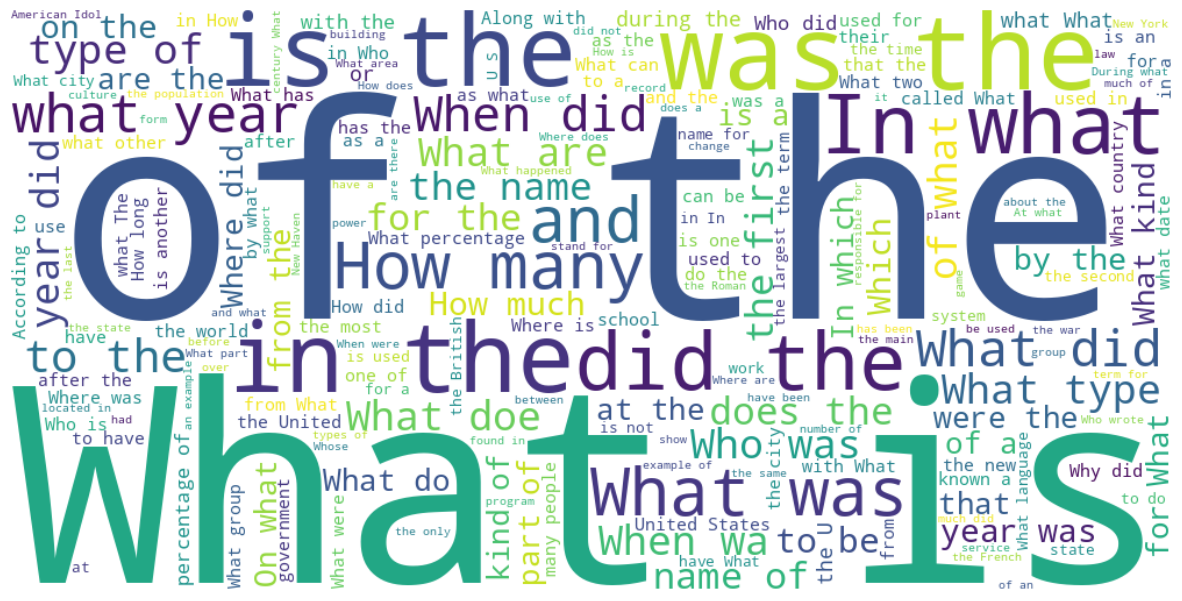

In [50]:
displayWordCloud(worldCloud)

In [51]:
def findWord(text,word): return text.lower().count(word.lower())

def wordOccurrence(wordCloud, text):
  words = [w for w in list(wordCloud.words_.keys())[:40] if len(w) > 1]
  occurrences_map = {w: findWord(text, w) for w in words}
  keys = list(occurrences_map.keys())
  values = list(occurrences_map.values())
  plt.figure(figsize=(20, 6))
  plt.bar(keys, values)
  plt.title('Occurrences des mots du WordCloud')
  plt.xlabel('Mots')
  plt.ylabel('Occurrences')
  plt.xticks(rotation=45, ha='right')
  plt.show()

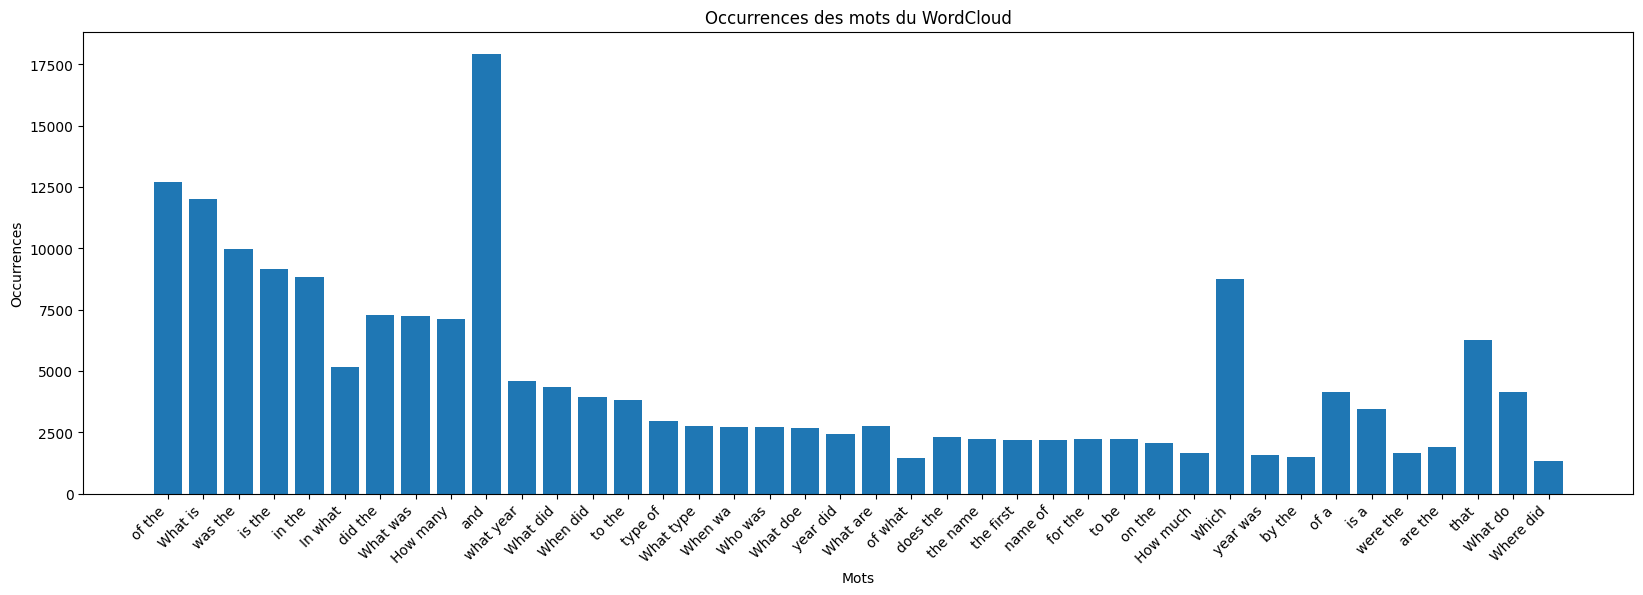

In [58]:
findWord(textTrain,"What")
wordOccurrence(worldCloud,textTrain)